In [43]:
import numpy as np
from tensorflow.keras.utils import load_img
from keras.applications import vgg16, vgg19

In [25]:
model = vgg16.VGG16()
model

In [37]:
img = load_img('cat.jpg', target_size=(224,224))

In [38]:
img=np.array(img)

In [39]:
img=np.expand_dims(img,axis=0)

In [40]:
pred_img = model.predict(img)

1/1 [==============================] - 0s 130ms/step


In [41]:
vgg16.decode_predictions(pred_img, top=10)

[[('n02096585', 'Boston_bull', 0.07822936),
  ('n02124075', 'Egyptian_cat', 0.05648423),
  ('n03887697', 'paper_towel', 0.050537653),
  ('n15075141', 'toilet_tissue', 0.048761316),
  ('n02123045', 'tabby', 0.044568457),
  ('n02110806', 'basenji', 0.044236403),
  ('n04040759', 'radiator', 0.038446415),
  ('n02808304', 'bath_towel', 0.03739084),
  ('n02108915', 'French_bulldog', 0.0331777),
  ('n03125729', 'cradle', 0.031581156)]]

In [68]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D 
from tensorflow.keras.applications import MobileNet 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import os
import shutil

In [53]:
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(240, 240, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0     

In [54]:
my_model = Sequential()

In [56]:
my_model.add(base_model)

In [57]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [58]:
my_model.add(Flatten())

In [62]:
my_model.add(Dense(64, activation='relu'))
my_model.add(Dropout(0.25))
my_model.add(Dense(2, activation='softmax'))

In [64]:
my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 16,324,674
Trainable params: 16,324,674
No

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [67]:
#이미지 회전, 좌우 이동, 상하 이동, ...
datagen=ImageDataGenerator(
    rotation_range = 20,     #이미지 회전
    width_shift_range=0.2, #.좌우 이동, 이미지 폭 10센티라면 좌우로 0~2센티까지 랜덤하게 이동
    height_shift_range=0.2 
)

In [69]:
product=['apple','grape']

In [78]:
for i in product:
    image_list=os.listdir(i)
    augment_number=100 #증식 이미지 개수
    for f in image_list:
        image=np.expand_dims(plt.imread(f),0)

FileNotFoundError: [Errno 2] No such file or directory: '사과.png'

In [86]:
for i in product:
    image_list=os.listdir(i)
    augment_number = 100
    for f in image_list:
        image=np.expand_dims(plt.imread(f'{i}/{f}'),0)
        datagen.fit(image)
        datagen.flow(image, save_to_dir=i, save_prefix=f, save_format='png')

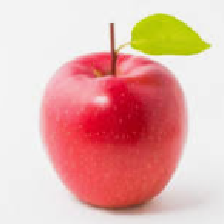

In [88]:
img=load_img("apple/apple.png", target_size=(224,224))
img

In [89]:
x=np.array(img)
x=np.expand_dims(x,axis=0)
i=0

In [91]:
for _ in datagen.flow(x, batch_size=1, save_to_dir='apple_aug', save_prefix='ap', save_format='png'):
    i+=1
    if i >30:
        break

In [92]:
for i in product:
    image_list=os.listdir(i) #'apple.png', 'grape.png'
    c=0
    augment_number=100 #증식 이미지 개수
    for f in image_list: #'apple.png'
        file_path = os.path.join(i, f)  #apple/apple.png
        image = np.expand_dims(plt.imread(file_path), 0)
        #print(image)        
        for _ in datagen.flow(image,
                                    batch_size=1,
                                    save_to_dir=i,
                                    save_prefix=i,
                                    save_format='png'):
            c+=1
            if c>augment_number:
                break